In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('bjk_xg.csv',sep=';')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      28 non-null     object
 1   bjk_goal  28 non-null     int64 
 2   bjk_xG    28 non-null     object
 3   opp_goal  28 non-null     int64 
 4   opp_xG    28 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.2+ KB


In [20]:
df['bjk_xG'] = pd.to_numeric(df['bjk_xG'].astype(str).str.replace(',','.'),errors='coerce')
df['opp_xG'] = pd.to_numeric(df['opp_xG'].astype(str).str.replace(',','.'),errors='coerce')
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df['bjk_xG_cumulative'] = df['bjk_xG'].cumsum()
df['bjk_goal_cumulative'] = df['bjk_goal'].cumsum()
df['opp_xG_cumulative'] = df['opp_xG'].cumsum()
df['opp_goal_cumulative'] = df['opp_goal'].cumsum()

### Besiktas xG flow chart

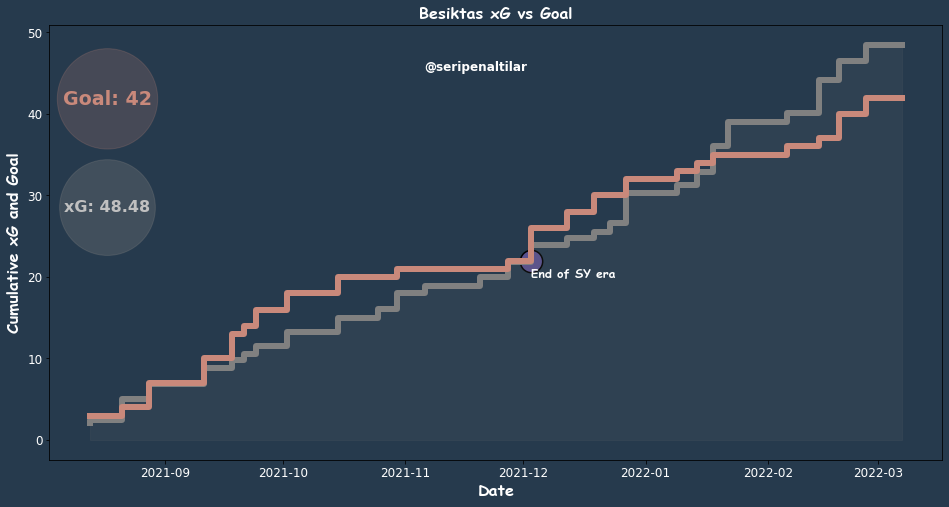

In [105]:
fig,ax = plt.subplots(figsize=(16,8))

ax.step(x=df['Date'],y=df['bjk_xG_cumulative'],c="#808080",linewidth=6)
ax.step(x=df['Date'],y=df['bjk_goal_cumulative'],c="#c9897b",linewidth=6)


ax.scatter(x=df[df['Date']=='2021-12-03']['Date'],y=df[df['Date']=='2021-12-03']['bjk_goal_cumulative'], color='#58508d', edgecolor='black',s=500,linewidths=1.5)
ax.annotate('End of SY era',(df[df['Date']=='2021-12-03']['Date'],df[df['Date']=='2021-12-03']['bjk_goal_cumulative']-2),
           color='white',weight='bold',family='Comic Sans MS',size=12)

ax.set_facecolor(color='#263a4d')
fig.patch.set_facecolor('#263a4d')

plt.fill_between(df['Date'],df['bjk_xG_cumulative'],alpha=0.1,color="#808080",step='pre')
# in fill_between y should be adjusted depending on which one is more xG or Goal

plt.text(0.065, 0.83, "Goal: {}".format(df['bjk_goal_cumulative'].max()), size=19,
         ha="center", va="center",transform=ax.transAxes,
         color="#c9897b",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#c9897b',alpha=0.20)
         )

plt.text(0.065, 0.58, "xG: {}".format(round(df['bjk_xG_cumulative'].max(),2)), size=16,
         ha="center", va="center",transform=ax.transAxes,
         color="#C0C0C0",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#808080',alpha=0.30)
         )

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xG and Goal', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
plt.title('Besiktas xG vs Goal',fontdict=font)
plt.grid(False)
plt.figtext(0.45,0.8,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)

plt.show()

### Opponents of BJK xG flow chart

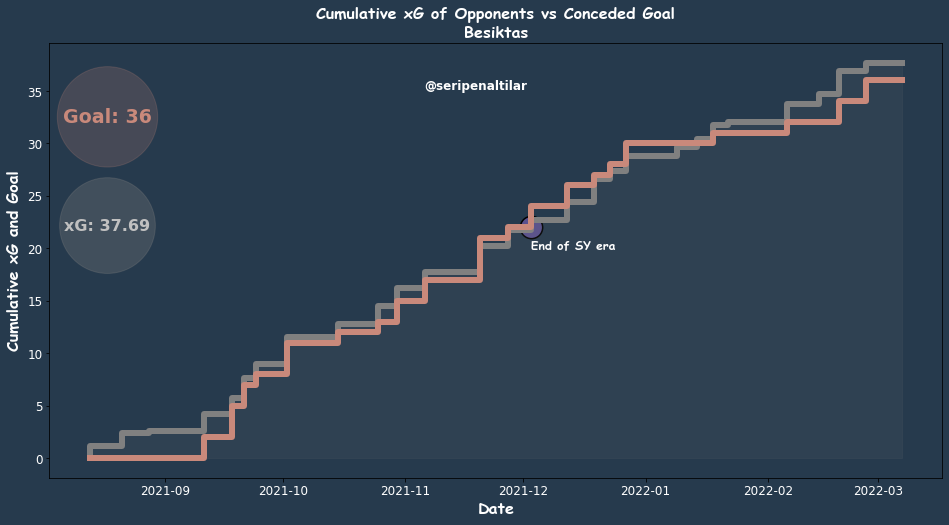

In [104]:
fig,ax = plt.subplots(figsize=(16,8))

ax.step(x=df['Date'],y=df['opp_xG_cumulative'],c="#808080",linewidth=6)
ax.step(x=df['Date'],y=df['opp_goal_cumulative'],c="#c9897b",linewidth=6)

ax.scatter(x=df[df['Date']=='2021-12-03']['Date'],y=df[df['Date']=='2021-12-03']['opp_goal_cumulative'], color='#58508d', edgecolor='black',s=500,linewidths=1.5)
ax.annotate('End of SY era',(df[df['Date']=='2021-12-03']['Date'],df[df['Date']=='2021-12-03']['opp_goal_cumulative']-2),
           color='white',weight='bold',family='Comic Sans MS',size=12)

ax.set_facecolor(color='#263a4d')
fig.patch.set_facecolor('#263a4d')

plt.fill_between(df['Date'],df['opp_xG_cumulative'],alpha=0.1,color="#808080",step='pre')
# in fill_between y should be adjusted depending on which one is more xG or Goal

plt.text(0.065, 0.83, "Goal: {}".format(df['opp_goal_cumulative'].max()), size=19,
         ha="center", va="center",transform=ax.transAxes,
         color="#c9897b",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#c9897b',alpha=0.20)
         )

plt.text(0.065, 0.58, "xG: {}".format(round(df['opp_xG_cumulative'].max(),2)), size=16,
         ha="center", va="center",transform=ax.transAxes,
         color="#C0C0C0",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#808080',alpha=0.30)
         )

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xG and Goal', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
plt.title('Cumulative xG of Opponents vs Conceded Goal\nBesiktas',fontdict=font)
plt.grid(False)
plt.figtext(0.45,0.8,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)

plt.show()

### Rolling Mean

In [43]:
# adding rolling mean
df['bjk_xG_roll_mean'] = df['bjk_xG'].rolling(window=5).mean()
df['opp_xG_roll_mean'] = df['opp_xG'].rolling(window=5).mean()

In [51]:
# creating new df and renaming columns
roll = df.dropna()[['Date','bjk_xG_roll_mean','opp_xG_roll_mean']]
roll.rename(columns={'bjk_xG_roll_mean':'bjk','opp_xG_roll_mean':'opp'},inplace=True)

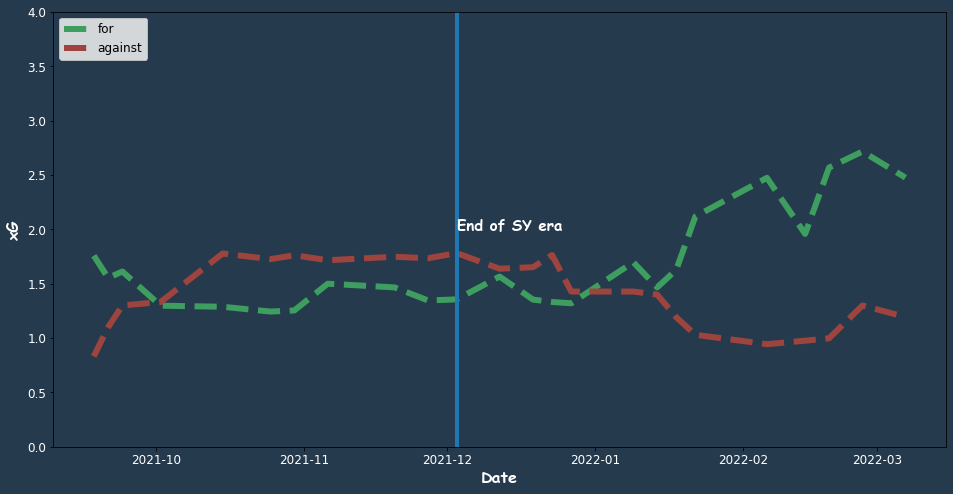

In [126]:
fig,ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

plt.plot(roll['Date'],roll['bjk'],ls='dashed',lw=6,c='#3e9e5f',label='for')
plt.plot(roll['Date'],roll['opp'],ls='dashed',lw=6,c='#9e443e',label='against')

#adding vertical line for annotation
plt.axvline(x=roll[roll['Date']=='2021-12-03']['Date'], ymin=0, ymax=4,lw=4)
plt.annotate('End of SY era',(roll[roll['Date']=='2021-12-03']['Date'],2),
           color='white',weight='bold',family='Comic Sans MS',size=15)

plt.ylim(0,4)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('xG', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')

plt.legend(loc=2,prop={'size': 12})
plt.show()